Manipulating canopy rasters for comparison simulation

In [9]:
from iotools import read_AsciiGrid, write_AsciiGrid
import numpy as np
import matplotlib.pyplot as plt
eps = np.finfo(float).eps
aurela = True

In [10]:
LAI_decid, info, _, _, _ = read_AsciiGrid(r'testcase_input/parameters/LAI_decid.dat')
LAI_conif, _, _, _, _ = read_AsciiGrid(r'testcase_input/parameters/LAI_conif.dat')
#LAI_pine, _, _, _, _ = read_AsciiGrid(r'testcase_input/parameters/LAI_pine.dat')
#LAI_spruce, _, _, _, _ = read_AsciiGrid(r'testcase_input/parameters/LAI_spruce.dat')
LAI_shrub, _, _, _, _ = read_AsciiGrid(r'testcase_input/parameters/LAI_shrub.dat')
LAI_grass, _, _, _, _ = read_AsciiGrid(r'testcase_input/parameters/LAI_grass.dat')
sitetype, _, _, _, _ = read_AsciiGrid(r'testcase_input/parameters/sitetype.dat')
cf, _, _, _, _ = read_AsciiGrid(r'testcase_input/parameters/cf.dat')
hc, _, _, _, _ = read_AsciiGrid(r'testcase_input/parameters/hc.dat')
r, c = np.shape(hc)

In [11]:
sitetyper = np.ravel(sitetype)
LAI_conifr = np.ravel(LAI_conif)
#LAI_piner = np.ravel(LAI_pine)
#LAI_sprucer = np.ravel(LAI_spruce)
LAI_decidr = np.ravel(LAI_decid)
LAI_shrubr = np.ravel(LAI_shrub)
LAI_grassr = np.ravel(LAI_grass)
cfr = np.ravel(cf)
hcr = np.ravel(hc)

LAI_conifr_new = LAI_conifr.copy()
#LAI_piner_new = LAI_piner.copy()
#LAI_sprucer_new = LAI_sprucer.copy()
LAI_decidr_new = LAI_decidr.copy()
LAI_shrubr_new = LAI_shrubr.copy()
LAI_grassr_new = LAI_grassr.copy()
cfr_new = cfr.copy()
hcr_new = hcr.copy()

In [12]:
for i in np.unique(sitetyper[~np.isnan(sitetyper)]):
    print(i)
    conif_av = np.nanmean(LAI_conifr[np.where(sitetyper == i)])
    #pine_av = np.nanmean(LAI_piner[np.where(sitetyper == i)])
    #spruce_av = np.nanmean(LAI_sprucer[np.where(sitetyper == i)])
    decid_av = np.nanmean(LAI_decidr[np.where(sitetyper == i)])
    shrub_av = np.nanmean(LAI_shrubr[np.where(sitetyper == i)])
    grass_av = np.nanmean(LAI_grassr[np.where(sitetyper == i)])
    fract_av = np.nanmean(cfr[np.where(sitetyper == i)])
    height_av = np.nanmean(hcr[np.where(sitetyper == i)])
    #LAI_piner_new[np.where(sitetyper == i)] = pine_av
    #LAI_sprucer_new[np.where(sitetyper == i)] = spruce_av
    LAI_conifr_new[np.where(sitetyper == i)] = conif_av
    LAI_decidr_new[np.where(sitetyper == i)] = decid_av
    LAI_shrubr_new[np.where(sitetyper == i)] = shrub_av
    LAI_grassr_new[np.where(sitetyper == i)] = grass_av
    cfr_new[np.where(sitetyper == i)] = fract_av
    hcr_new[np.where(sitetyper == i)] = height_av

if aurela:
    LAI_conifr_new[np.where(sitetyper == 1)] = 2.0
    LAI_decidr_new[np.where(sitetyper == 1)] = 0.1
    LAI_shrubr_new[np.where(sitetyper == 1)] = eps
    LAI_grassr_new[np.where(sitetyper == 1)] = eps
    hcr_new[np.where(sitetyper == 1)] = 13

    LAI_conifr_new[np.where(sitetyper == 4)] = eps
    LAI_decidr_new[np.where(sitetyper == 4)] = eps
    LAI_shrubr_new[np.where(sitetyper == 4)] = 0.7
    LAI_grassr_new[np.where(sitetyper == 4)] = 0.7
    hcr_new[np.where(sitetyper == 4)] = 0.4
    
    
LAI_conifr_new = LAI_conifr_new.reshape(r, c)
#LAI_piner_new = LAI_piner_new.reshape(r, c)
#LAI_sprucer_new = LAI_sprucer_new.reshape(r, c)
LAI_decidr_new = LAI_decidr_new.reshape(r, c)
LAI_shrubr_new = LAI_shrubr_new.reshape(r, c)
LAI_grassr_new = LAI_grassr_new.reshape(r, c)
cfr_new = cfr_new.reshape(r, c)
hcr_new = hcr_new.reshape(r, c)

1.0
2.0
3.0
4.0


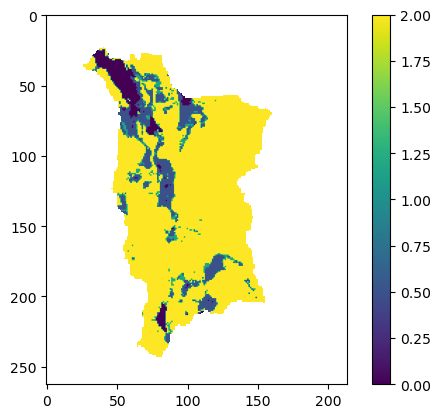

In [5]:
plt.imshow(LAI_conifr_new); plt.colorbar()

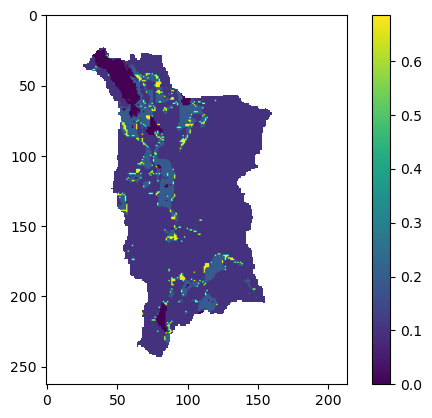

In [6]:
plt.imshow(LAI_decidr_new); plt.colorbar()

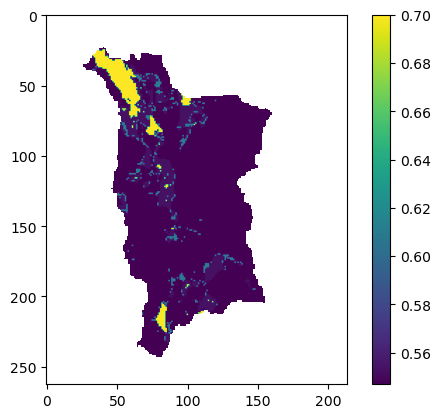

In [7]:
plt.imshow(LAI_shrubr_new); plt.colorbar()

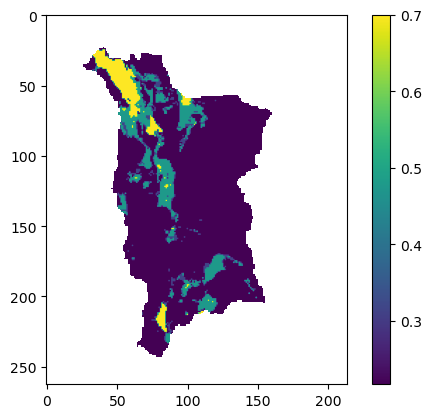

In [8]:
plt.imshow(LAI_grassr_new); plt.colorbar()

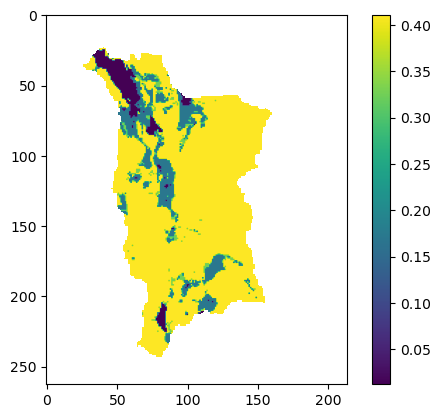

In [9]:
plt.imshow(cfr_new); plt.colorbar()

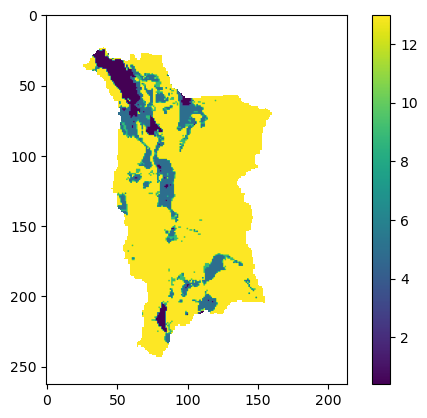

In [7]:
plt.imshow(hcr_new); plt.colorbar()

In [13]:
write_AsciiGrid(fname=r'testcase_input/parameters/LAI_conif_aurela.dat', data=LAI_conifr_new, info=info)
#write_AsciiGrid(fname=r'testcase_input/parameters/LAI_pine_average.dat', data=LAI_piner_new, info=info)
#write_AsciiGrid(fname=r'testcase_input/parameters/LAI_spruce_average.dat', data=LAI_sprucer_new, info=info)
write_AsciiGrid(fname=r'testcase_input/parameters/LAI_decid_aurela.dat', data=LAI_decidr_new, info=info)
write_AsciiGrid(fname=r'testcase_input/parameters/LAI_shrub_aurela.dat', data=LAI_shrubr_new, info=info)
write_AsciiGrid(fname=r'testcase_input/parameters/LAI_grass_aurela.dat', data=LAI_grassr_new, info=info)
write_AsciiGrid(fname=r'testcase_input/parameters/hc_aurela.dat', data=hcr_new, info=info)
write_AsciiGrid(fname=r'testcase_input/parameters/cf_average.dat', data=cfr_new, info=info)

In [86]:
soilclass, info, _, _, _ = read_AsciiGrid(r'testcase_input/parameters/soil_id_peatsoils.dat')
soilclass[np.isfinite(soilclass)] = 2

write_AsciiGrid(fname=r'testcase_input/parameters/soil_id_2.dat', data=soilclass, info=info)

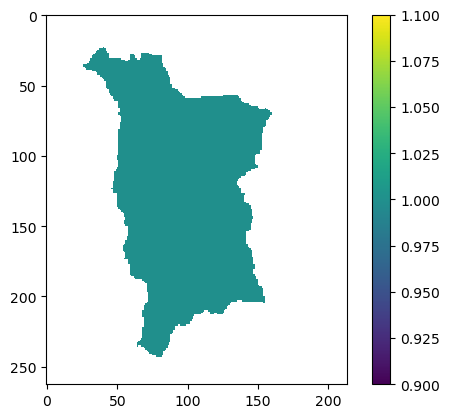

In [90]:
sitetype, info, _, _, _ = read_AsciiGrid(r'testcase_input/parameters/sitetype.dat')
sitetype[np.isfinite(sitetype)] = 1
plt.imshow(sitetype); plt.colorbar()
write_AsciiGrid(fname=r'testcase_input/parameters/sitetype_1.dat', data=sitetype, info=info)

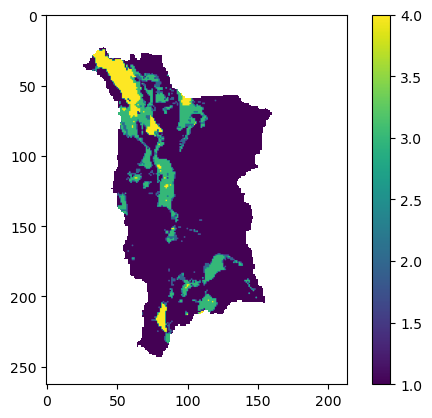